In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = "{:.3f}".format

In [2]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_chessworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)

            if "Successes x/29" in cur_df.columns:
                cur_df["Successes x/29"] *= (float(100)/29)
    
            if "Avg Discounted Return" in cur_df.columns:
                # cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
                cur_df.drop(columns=["Avg Steps"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = sum(final_dfs.values()) / len(final_dfs)
    df_std = sum([(df_mean - df_cur)**2 / len(final_dfs) for df_cur in final_dfs.values()]).apply(np.sqrt)
    return final_dfs, df_mean, df_std

In [3]:
# ChessWorld-v1 new finite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/finite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach
R_1 (F (pawn & F(rook & F(knight))))
R_2 (F ((rook&queen) & (F bishop)))
R_3 (F (bishop & rook) & (F (bishop & knight)))
Avoid 2
A2_1 (!(pawn | bishop) U (bishop & rook)) good
A2_2 (!(queen | pawn) U (rook & queen)) good
A2_3 (!(bishop | pawn) U (rook & knight)) good
A2_4 (! (knight | rook) U bishop)
A2_5 (! (bishop | knight) U queen)
A2_6 (! (rook | bishop) U pawn)
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen)) good
A3_4 (!(bishop | knight | queen) U (rook & queen)) good
Avoid 4
A4_1 (!(bishop | rook | knight | pawn) U (queen))
A4_2 (!(bishop | rook | knight | queen) U (pawn))
A4_3 (!(bishop | rook | pawn | queen) U (knight))
A4_4 (!(bishop | knight | pawn | queen) U (rook))
A4_5 (!(rook | knight | pawn | queen) U (bishop))
Avoid 5
A5_1 (!(bishop | rook | knight | pawn | queen) U (queen & pawn))
A5_2 (!(bishop | rook | knight | queen | pawn) U (pawn & rook))

In [4]:
# ChessWorld-v1 infinite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/infinite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach infinite training
RIT_1 (F (G bishop))
RIT_2 (F (G queen))
RIT_3 (F (G rook))
RIT_4 (F (G pawn))
RIT_5 (F (G knight))
RIT_6 (F (G (queen | bishop)))
RIT_7 (F (G (rook | queen)))
RIT_8 (F (G (knight | pawn)))
RIT_9 (F (G (bishop | knight)))
RIT_10 (F (G (rook | pawn)))
Reach avoid always eventually
RAE_1 ((G (F knight)) & (G (F queen)))
RAE_2 ((G (F pawn)) & (G (F rook)))
RAE_3 ((G (F bishop)) & (G (F knight)) & (G (! rook)))
RAE_4 ((G (F rook)) & (G (F pawn)) & (G (! knight)))
Reach stay infinite
RSI_1 (F (G (bishop & !rook)))
RSI_2 (F (G (knight & !bishop)))
RSI_3 (F (G (queen & pawn)))
RSI_4 (F (G (rook & queen)))
RSI_5 (F (G (queen & pawn))


In [5]:
files_finite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_deepsets_update_2',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_deepsets_formula_update',
                'ChessWorld-v1_gcn_formula_update2',
               ]

keys_seeds = ["DeepSets (C_1)", "Deepsets (C_3)", "GCN (C_3)", "Deepsets (C_4)", 'GCN (C_4)']

dfs_ra, df_ra_mean, df_ra_std = seed_read_results("ChessWorld-v1", files_finite_seeds, keys_seeds, list(range(1, 6)))

df_ra_mean

DeepSets (C_1)                        \
                                Successes x/29 Avg Discounted Return   
Task Set                Task ID                                        
Reach                   R_1            100.000                 0.947   
                        R_2            100.000                 0.924   
                        R_3            100.000                 0.883   
Avoid 2                 A2_1            41.379                 0.393   
                        A2_2            95.862                 0.914   
                        A2_3            17.241                 0.166   
                        A2_4            95.862                 0.944   
                        A2_5            63.448                 0.611   
                        A2_6            93.793                 0.893   
Avoid 3                 A3_1            14.483                 0.140   
                        A3_2            31.034                 0.299   
                        A3_3            80.000                 0.756   
                        A3_4            51.724                 0.493   
Avoid 4                 A4_1            35.862                 0.349   
                        A4_2            43.448                 0.418   
                        A4_3            88.276                 0.864   
                        A4_4            30.345                 0.297   
                        A4_5            89.655                 0.883   
Avoid 5                 A5_1            34.483                 0.326   
                        A5_2            25.517                 0.242   
                        A5_3            28.276                 0.274   
                        A5_4             2.759                 0.028   
                        A5_5            12.414                 0.122   
                        A5_6            15.172                 0.145   
Reach Avoid General     RA_1           100.000                 0.959   
                        RA_2            68.276                 0.618   
                        RA_3            90.345                 0.852   
                        RA_4           100.000                 0.962   
                        RA_5            98.621                 0.940   
                        RA_6            66.897                 0.637   
                        RA_7            51.034                 0.479   
Reach Avoid X and not Y RXNY_1          86.897                 0.852   
                        RXNY_2         100.000                 0.987   
                        RXNY_3          63.448                 0.611   
                        RXNY_4          88.966                 0.877   
                        RXNY_5          24.138                 0.236   

                                Deepsets (C_3)                        \
                                Successes x/29 Avg Discounted Return   
Task Set                Task ID                                        
Reach                   R_1             92.414                 0.869   
                        R_2            100.000                 0.932   
                        R_3             97.241                 0.860   
Avoid 2                 A2_1            89.655                 0.837   
                        A2_2            97.241                 0.937   
                        A2_3            82.069                 0.782   
                        A2_4            94.483                 0.933   
                        A2_5            73.793                 0.710   
                        A2_6            93.793                 0.905   
Avoid 3                 A3_1            68.966                 0.660   
                        A3_2            40.690                 0.386   
                        A3_3            84.138                 0.808   
                        A3_4            74.483                 0.714   
Avoid 4                 A4_1            72.414                 0.696   

In [6]:
df_ra_mean.groupby("Task Set").mean()

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                         67.931                 0.654         88.506   
Avoid 3                         44.310                 0.422         67.069   
Avoid 4                         57.517                 0.562         85.241   
Avoid 5                         19.770                 0.189         49.310   
Reach                          100.000                 0.918         96.552   
Reach Avoid General             82.167                 0.778         91.921   
Reach Avoid X and not Y         72.690                 0.713         84.138   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.851         84.483   
Avoid 3                                 0.642         69.138   
Avoid 4                                 0.830         71.862   
Avoid 5                                 0.475         47.356   
Reach                                   0.887         98.161   
Reach Avoid General                     0.876         82.956   
Reach Avoid X and not Y                 0.823         70.483   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.812         92.299   
Avoid 3                                 0.660         68.793   
Avoid 4                                 0.700         91.172   
Avoid 5                                 0.457         67.126   
Reach                                   0.891         99.080   
Reach Avoid General                     0.789         91.527   
Reach Avoid X and not Y                 0.689         91.862   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.886         93.103   
Avoid 3                                 0.658         79.828   
Avoid 4                                 0.886         91.448   
Avoid 5                                 0.642         72.989   
Reach                                   0.906         99.540   
Reach Avoid General                     0.873         92.808   
Reach Avoid X and not Y                 0.897         89.931   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.893  
Avoid 3                                 0.761  
Avoid 4                                 0.889  
Avoid 5                                 0.698  
Reach                                   0.917  
Reach Avoid General                     0.884  
Reach Avoid X and not Y                 0.878

In [7]:
df_ra_mean.groupby("Task Set").std()

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                         33.238                 0.321          8.935   
Avoid 3                         28.253                 0.266         18.671   
Avoid 4                         29.087                 0.288         10.900   
Avoid 5                         11.717                 0.111         26.912   
Reach                            0.000                 0.033          3.840   
Reach Avoid General             19.870                 0.197          9.403   
Reach Avoid X and not Y         30.229                 0.300         10.136   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.092         17.435   
Avoid 3                                 0.182         12.174   
Avoid 4                                 0.116         19.220   
Avoid 5                                 0.257         22.847   
Reach                                   0.039          2.611   
Reach Avoid General                     0.094         13.011   
Reach Avoid X and not Y                 0.108         18.566   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.170          7.408   
Avoid 3                                 0.119         23.820   
Avoid 4                                 0.194          7.305   
Avoid 5                                 0.219         14.023   
Reach                                   0.034          1.593   
Reach Avoid General                     0.127          9.199   
Reach Avoid X and not Y                 0.183          6.568   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.085          6.381   
Avoid 3                                 0.225          9.694   
Avoid 4                                 0.085          7.389   
Avoid 5                                 0.137         10.362   
Reach                                   0.053          0.796   
Reach Avoid General                     0.092          6.577   
Reach Avoid X and not Y                 0.078          7.596   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.075  
Avoid 3                                 0.096  
Avoid 4                                 0.084  
Avoid 5                                 0.102  
Reach                                   0.032  
Reach Avoid General                     0.067  
Reach Avoid X and not Y                 0.085

In [8]:
files_infinite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                'ChessWorld-v1_deepsets_update_2_inf',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                'ChessWorld-v1_deepsets_formula_update_inf',
                'ChessWorld-v1_gcn_formula_update_inf',
               ]

dfs_rs, df_rs_mean, df_rs_std = seed_read_results("ChessWorld-v1", files_infinite_seeds, keys_seeds, list(range(1, 6)))

df_rs_mean

DeepSets (C_1)   Deepsets (C_3)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1             19.483           19.476   
                              RIT_2             31.855           31.931   
                              RIT_3             38.317           36.917   
                              RIT_4             37.979           41.324   
                              RIT_5             18.993            0.000   
                              RIT_6             19.497           35.517   
                              RIT_7             36.669           48.938   
                              RIT_8             19.290           23.807   
                              RIT_9             18.276           17.883   
                              RIT_10            37.766           48.186   
Reach avoid always eventually RAE_1             44.110           38.234   
                              RAE_2             45.745           75.034   
                              RAE_3             37.641           46.834   
                              RAE_4             15.559           62.717   
Reach stay infinite           RSI_1             15.883            8.531   
                              RSI_2             19.221            0.145   
                              RSI_3             35.786           45.083   
                              RSI_4             36.117           23.331   
                              RSI_5             35.786           45.083   

                                             GCN (C_3)   Deepsets (C_4)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1             66.062           25.972   
                              RIT_2             72.697           37.214   
                              RIT_3             75.055           37.014   
                              RIT_4             70.745           38.538   
                              RIT_5             27.338           30.476   
                              RIT_6             56.993           38.138   
                              RIT_7             61.483           34.731   
                              RIT_8             73.421           37.428   
                              RIT_9             73.483           33.262   
                              RIT_10            75.110           38.034   
Reach avoid always eventually RAE_1             35.938           44.041   
                              RAE_2             66.469           55.793   
                              RAE_3             51.193           39.538   
                              RAE_4             26.952           65.752   
Reach stay infinite           RSI_1             53.807           22.407   
                              RSI_2             13.710           25.621   
                              RSI_3             74.166           38.393   
                              RSI_4             37.986           38.386   
                              RSI_5             74.166           38.393   

                                             GCN (C_4)  
                                      Accepting visits  
Task Set                      Task ID                   
Reach infinite training       RIT_1             75.428  
                              RIT_2             57.662  
                              RIT_3             56.083  
                              RIT_4             57.862  
                              RIT_5             57.324  
                              RIT_6             73.586  
                              RIT_7             57.779  
                              RIT_8             58.090  
                              RIT_9             71.386  
                              RIT_10            57.876

In [9]:
df_rs_m1 = df_rs_mean.iloc[:-1]

# df_rs_m1
df_rs_m1.groupby("Task Set").mean()

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,35.764,55.705,45.138,51.281,49.224
Reach infinite training,27.812,30.398,65.239,35.081,62.308
Reach stay infinite,26.752,19.272,44.917,31.202,44.464


In [10]:
df_rs_m1.groupby("Task Set").std()

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,13.917,16.398,17.388,11.833,10.703
Reach infinite training,9.354,15.253,14.659,4.102,7.779
Reach stay infinite,10.711,19.697,25.537,8.403,15.439


In [11]:
def make_latest_ablation_graphs(cols, colors, parent_dir="chessworld8_ablation/stay_update/", col_names=None):
    if col_names is None:
        col_names = cols
        
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    # print(df_mean)
    
    # labels = ["Deepsets (large avoid)", "Deepsets (15M)", "GCN (15M)", "Deepsets (formula)"]
    # colors = ["purple", "red", "blue", "black"]
    i = 0
    
    for col, col_name in zip(cols, col_names):
        df_mean = mean_df[col]
        df_std = std_df[col]
        
        plt.plot(df_mean.index, df_mean["successes_mean"], label=col_name, color=colors[i])  # Mean line
        plt.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])  # Mean line

        plt.fill_between(df_mean.index,
                         df_mean["successes_mean"] - df_std["successes_mean"],
                         df_mean["successes_mean"] + df_std["successes_mean"],
                         color=colors[i], alpha=0.2)  # Confidence interval

        i += 1

    plt.xlabel("Number of Pieces to Avoid")
    plt.ylabel("Success Rate")
    plt.title("Success rate as number of pieces to avoid increases")
    plt.legend(title="Models")
    plt.show()
    
    plt.show()
    

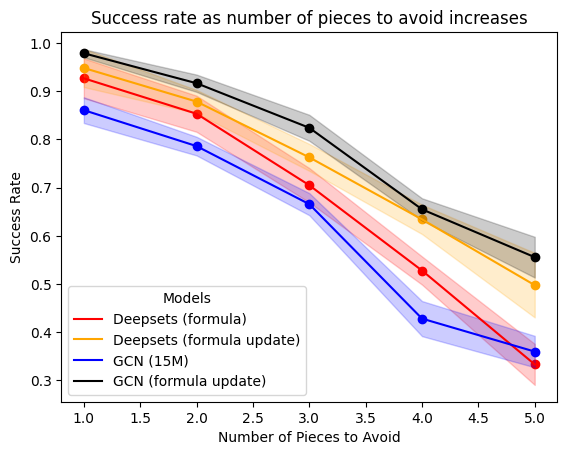

In [12]:
ablation_cols = ["Deepsets (formula)", "Deepsets (formula update)", "GCN (15M)", "GCN (formula update)"]
colors = ['red', 'orange', 'blue', 'black']

make_latest_ablation_graphs(ablation_cols, colors)

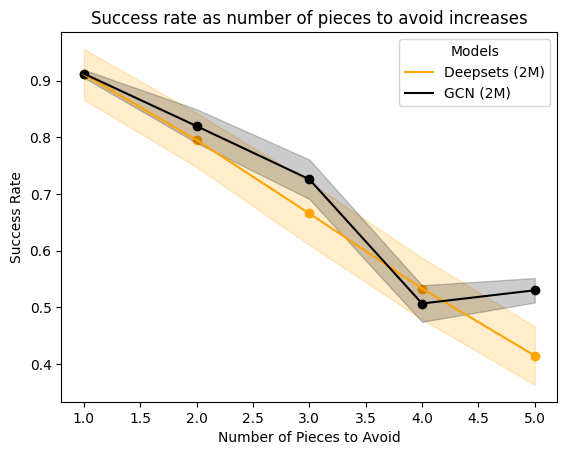

In [13]:
ablation_cols = ["Deepsets (2M)", "GCN (2M)"]
colors = ['orange', 'black']

make_latest_ablation_graphs(ablation_cols, colors)

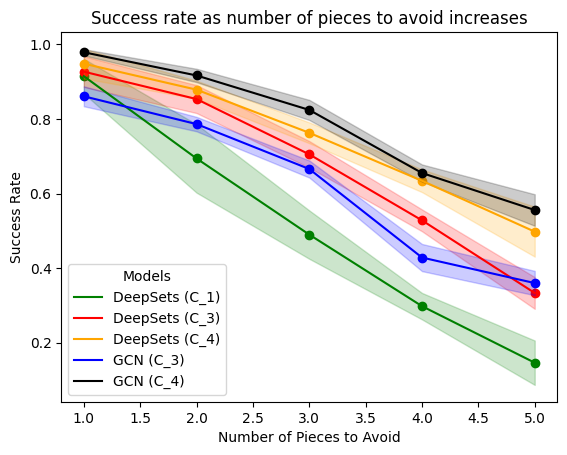

In [14]:
ablation_cols = ["Deepsets (15M)", "Deepsets (formula)", "Deepsets (formula update)", "GCN (15M)", "GCN (formula update)"]
col_names = ["DeepSets (C_1)", "DeepSets (C_3)", "DeepSets (C_4)", "GCN (C_3)", "GCN (C_4)"]
colors = ['green', 'red', 'orange', 'blue', 'black']

make_latest_ablation_graphs(ablation_cols, colors, col_names=col_names)

In [15]:
def plot_results(env, exp_list, labels, colors, seed_list=None):

    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]

    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/{exp}/{i}.csv", header=0) for i in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        plt.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])  # Mean line
        plt.fill_between(mean_df.index,
                         mean_df["return"] - std_df["return"],
                         mean_df["return"] + std_df["return"],
                         color=colors[i], alpha=0.2)

    plt.xlabel("Number of Training Steps (/229376)")
    plt.ylabel("ADR")
    plt.title("ADR over time")
    plt.legend(title="Models")
    plt.show()

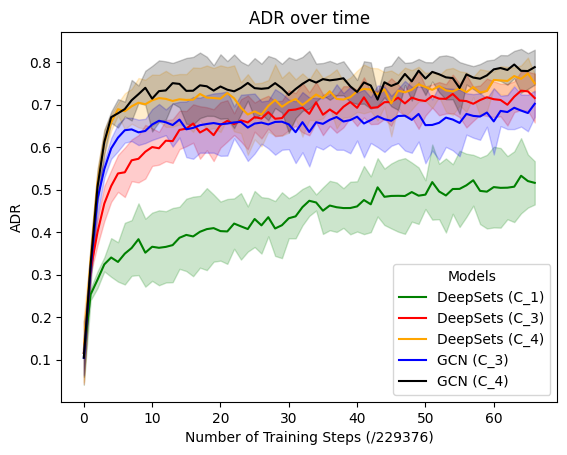

In [16]:

files_adr = [
                'deepsets_stay_update_4_finest',
                'deepsets_update_2',
                'deepsets_formula_update',
                'gcn_formula_big_skip_6_finer',
                'gcn_formula_update',
               ]

col_adr = ["DeepSets (C_1)", "DeepSets (C_3)", "DeepSets (C_4)", "GCN (C_3)", "GCN (C_4)"]
color_adr = ['green', 'red', 'orange', 'blue', 'black']


plot_results('ChessWorld-v1', files_adr, col_adr, color_adr)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_results(env, exp_list, labels, colors, cols, 
                           seed_list=None, parent_dir="chessworld8_ablation/stay_update/", col_names=None):
    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]
    if col_names is None:
        col_names = cols

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ### Left Plot: ADR over time (from plot_results)
    ax = axes[0]
    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/{exp}/{seed}.csv", header=0) for seed in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        ax.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])
        ax.fill_between(mean_df.index,
                        mean_df["return"] - std_df["return"],
                        mean_df["return"] + std_df["return"],
                        color=colors[i], alpha=0.2)

    ax.set_xlabel("Number of Training Steps (/229376)")
    ax.set_ylabel("ADR")
    ax.set_title("ADR over Time")
    ax.legend(title="Models")

    ### Right Plot: Success Rate vs Number of Pieces to Avoid (from make_latest_ablation_graphs)
    ax = axes[1]
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    for i, (col, col_name) in enumerate(zip(cols, col_names)):
        df_mean = mean_df[col]
        df_std = std_df[col]

        ax.plot(df_mean.index, df_mean["successes_mean"], label=col_name, color=colors[i])
        ax.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])
        ax.fill_between(df_mean.index,
                        df_mean["successes_mean"] - df_std["successes_mean"],
                        df_mean["successes_mean"] + df_std["successes_mean"],
                        color=colors[i], alpha=0.2)

    ax.set_xlabel("Number of Pieces to Avoid")
    ax.set_ylabel("Success Rate")
    ax.set_title("Success Rate vs Number of Pieces to Avoid")
    ax.legend(title="Models")

    plt.tight_layout()
    plt.show()


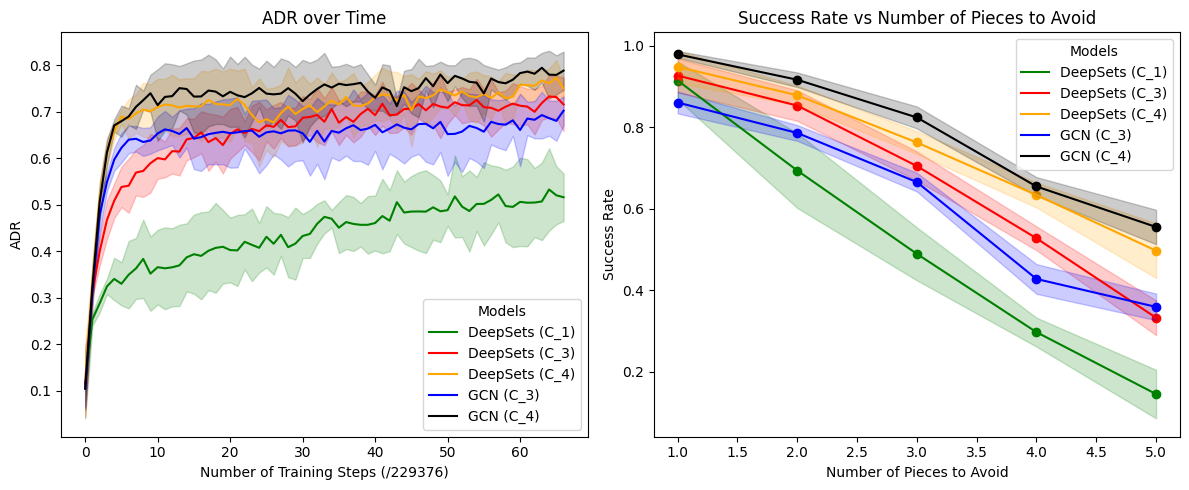

In [18]:
plot_combined_results('ChessWorld-v1', files_adr, col_adr, color_adr, ablation_cols, col_names=col_names)

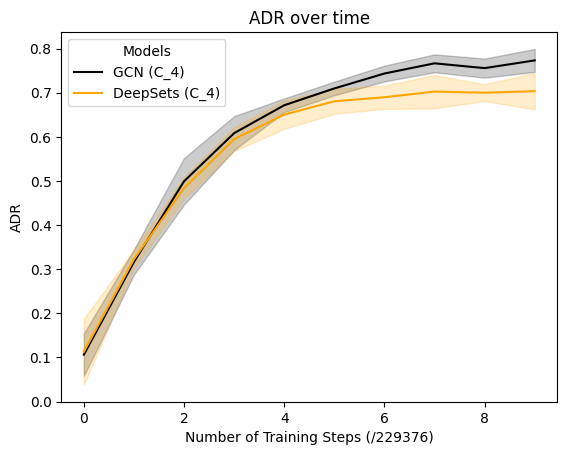

In [19]:
plot_results('ChessWorld-v1', ['gcn_race_update', 'deepsets_race_update',],
             ['GCN (C_4)', 'DeepSets (C_4)'],
             ['black', 'orange'])